In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:
social_data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [6]:
social_data.dropna(how='any', inplace=True)
social_data.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [8]:
# 1. Did people become less trusting from 2012 to 2014? 

social_data_2012 = social_data[social_data['year'] == 6]
social_data_2014 = social_data[social_data['year'] == 7]

print((social_data_2012['ppltrst'].mean() - social_data_2014['ppltrst'].mean()))

0.007088422406118511


In [9]:
# Compute results for each country in the sample.
# split up each country and compare 2012 - 2014

social_ch_2012 = social_data_2012[social_data_2012['cntry'] == 'CH']
social_cz_2012 = social_data_2012[social_data_2012['cntry'] == 'CZ']
social_de_2012 = social_data_2012[social_data_2012['cntry'] == 'DE']
social_es_2012 = social_data_2012[social_data_2012['cntry'] == 'ES']
social_no_2012 = social_data_2012[social_data_2012['cntry'] == 'NO']
social_se_2012 = social_data_2012[social_data_2012['cntry'] == 'SE']

social_ch_2014 = social_data_2014[social_data_2014['cntry'] == 'CH']
social_cz_2014 = social_data_2014[social_data_2014['cntry'] == 'CZ']
social_de_2014 = social_data_2014[social_data_2014['cntry'] == 'DE']
social_es_2014 = social_data_2014[social_data_2014['cntry'] == 'ES']
social_no_2014 = social_data_2014[social_data_2014['cntry'] == 'NO']
social_se_2014 = social_data_2014[social_data_2014['cntry'] == 'SE']

In [29]:
# 
print('Switzerland\'s change')
print((social_ch_2012['ppltrst'].mean()-social_ch_2014['ppltrst'].mean()))
print('Czech Republic\'s change')
print((social_cz_2012['ppltrst'].mean()-social_cz_2014['ppltrst'].mean()))
print('Germany\'s change')
print((social_de_2012['ppltrst'].mean()-social_de_2014['ppltrst'].mean()))
print('Spain\'s change')
print((social_es_2012['ppltrst'].mean()-social_es_2014['ppltrst'].mean()))
print('Norway\'s change')
print((social_no_2012['ppltrst'].mean()-social_no_2014['ppltrst'].mean()))
print('Sweden\'s change')
print((social_se_2012['ppltrst'].mean()-social_se_2014['ppltrst'].mean()))

Switzerland's change
-0.07867602174025023
Czech Republic's change
0.04622658605294738
Germany's change
-0.2802197802197801
Spain's change
0.187771289671117
Norway's change
0.048585983622167817
Sweden's change
-0.19683438670270537


In [11]:
# 2. Did people become happier from 2012 to 2014? 
print('Overall:')
print((social_data_2012['happy'].mean() - social_data_2014['happy'].mean()))
# Compute results for each country in the sample.

print('Switzerland\'s change')
print((social_ch_2012['happy'].mean()-social_ch_2014['happy'].mean()))
print('Czech Republic\'s change')
print((social_cz_2012['happy'].mean()-social_cz_2014['happy'].mean()))
print('Germany\'s change')
print((social_de_2012['happy'].mean()-social_de_2014['happy'].mean()))
print('Spain\'s change')
print((social_es_2012['happy'].mean()-social_es_2014['happy'].mean()))
print('Norway\'s change')
print((social_no_2012['happy'].mean()-social_no_2014['happy'].mean()))
print('Sweden\'s change')
print((social_se_2012['happy'].mean()-social_se_2014['happy'].mean()))

Overall:
0.0460396413127242
Switzerland's change
-0.05933153880663866
Czech Republic's change
-0.13209282658715082
Germany's change
-0.5494505494505493
Spain's change
0.1072410925606091
Norway's change
0.3328810385323431
Sweden's change
-0.03782193559475466


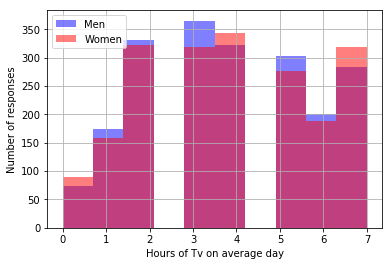

Men tv average
3.8592303945445687
Women tv average
3.9053518334985133


In [34]:
# 3. Who reported watching more TV in 2012, men or women?

# add together all the tv for men and tv for women and then average that
# then return the result or graph the result 
men_2012 = social_data_2012[social_data_2012['gndr']==1]
women_2012 = social_data_2012[social_data_2012['gndr']==2]

men_2012['tvtot'].hist(alpha=.5, color='blue', label='Men')
women_2012['tvtot'].hist(alpha=.5, color='red', label='Women')
plt.legend(loc='upper left')
plt.xlabel('Hours of Tv on average day')
plt.ylabel('Number of responses')
plt.show()

# get numbers to show who did more tv watching
print('Men tv average')
print(men_2012['tvtot'].mean())
print('Women tv average')
print(women_2012['tvtot'].mean())

In [38]:
# 4. Who was more likely to believe people were fair in 2012,
# people living with a partner or people living alone?
social_data_2012['fair'] = np.where((social_data_2012['pplfair'] > 5), 1, 0)

# get probability estimates by dividing # of 'fair' answers with total # answers

partner = social_data_2012.loc[(social_data_2012['partner']==1),['fair']].copy()
without_partner = social_data_2012.loc[(social_data_2012['partner']==2),['fair']].copy()

wp_think_fair = partner.loc[(partner['fair']==1)]
wp_think_not_fair = partner.loc[(partner['fair']==0)]
wop_think_fair = without_partner.loc[(without_partner['fair']==1)]
wop_think_not_fair = without_partner.loc[(without_partner['fair']==0)]

probs_partner_fair = len(wp_think_fair)/len(social_data_2012['fair'])
probs_partner_unfair = len(wp_think_not_fair)/len(social_data_2012['fair'])
probs_no_partner_fair = len(wop_think_fair)/len(social_data_2012['fair'])
probs_no_partner_unfair = len(wop_think_not_fair)/len(social_data_2012['fair'])

print('The probability someone with a partner believes others are fair is')
print(probs_partner_fair)
print('The probability someone with a partner believes others are not fair is')
print(probs_partner_unfair)
print('The probability someone without a partner believes others are fair is')
print(probs_no_partner_fair)
print('The probability someone without a partner believes others are not fair is')
print(probs_no_partner_unfair)

The probability someone with a partner believes others are fair is
0.3925325472856792
The probability someone with a partner believes others are not fair is
0.2318840579710145
The probability someone without a partner believes others are fair is
0.21468926553672316
The probability someone without a partner believes others are not fair is
0.16089412920658314


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
print(probs_partner_fair+probs_partner_unfair+probs_no_partner_fair+probs_no_partner_unfair)

1.0


6.874144357971474
0.00013058086527657678


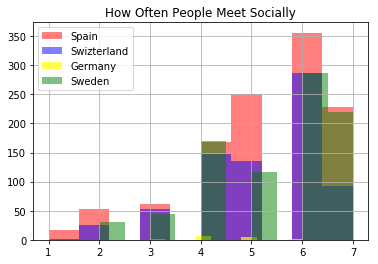

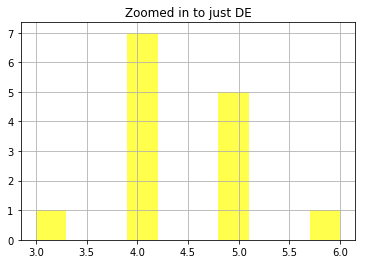

Spain Average:
5.263668430335097
Switzerland Average
5.174966352624495
Germany Average
4.428571428571429
Sweden Average
5.434832756632065


In [50]:
# 5. Pick three or four of the countries in the sample 
# and compare how often people met socially in 2014.
# Are there differences, and if so, which countries stand out?

F, p = stats.f_oneway(social_es_2014['sclmeet'],
                      social_ch_2014['sclmeet'],
                      social_de_2014['sclmeet'],
                      social_se_2014['sclmeet'])
print(F)
print(p)
social_es_2014['sclmeet'].hist(alpha=.5, color='red', label='Spain')
social_ch_2014['sclmeet'].hist(alpha=.5, color='blue', label='Swizterland')
social_de_2014['sclmeet'].hist(alpha=.7, color='yellow', label='Germany')
social_se_2014['sclmeet'].hist(alpha=.5, color='green', label='Sweden')
plt.legend()
plt.title('How Often People Meet Socially')
plt.show()
plt.title('Zoomed in to just DE')
social_de_2014['sclmeet'].hist(alpha=.7, color='yellow')
plt.show()

print('Spain Average:')
print(social_es_2014['sclmeet'].mean())
print('Switzerland Average')
print(social_ch_2014['sclmeet'].mean())
print('Germany Average')
print(social_de_2014['sclmeet'].mean())
print('Sweden Average')
print(social_se_2014['sclmeet'].mean())


In [56]:
print('Spain & Switzerland:')
print(stats.ttest_ind(social_es_2014['sclmeet'], social_ch_2014['sclmeet']))
print('Spain & Germany:')
print(stats.ttest_ind(social_es_2014['sclmeet'], social_de_2014['sclmeet']))
print('Spain & Sweden:')
print(stats.ttest_ind(social_es_2014['sclmeet'], social_se_2014['sclmeet']))
print('Germany & Switzerland:')
print(stats.ttest_ind(social_de_2014['sclmeet'], social_ch_2014['sclmeet']))
print('Germany & Sweden:')
print(stats.ttest_ind(social_de_2014['sclmeet'], social_se_2014['sclmeet']))
print('Switzerland & Sweden:')
print(stats.ttest_ind(social_ch_2014['sclmeet'], social_se_2014['sclmeet']))

Spain & Switzerland:
Ttest_indResult(statistic=1.3563979158247432, pvalue=0.17513589623821907)
Spain & Germany:
Ttest_indResult(statistic=2.168865565712128, pvalue=0.030298013218196748)
Spain & Sweden:
Ttest_indResult(statistic=-2.6925202988475645, pvalue=0.0071506085242787525)
Germany & Switzerland:
Ttest_indResult(statistic=-2.137774079859156, pvalue=0.032855611686425916)
Germany & Sweden:
Ttest_indResult(statistic=-2.739042801007487, pvalue=0.006286550691196736)
Switzerland & Sweden:
Ttest_indResult(statistic=-3.8811664926200904, pvalue=0.00010815819723507566)


12.584663886720783
3.598845381521039e-08


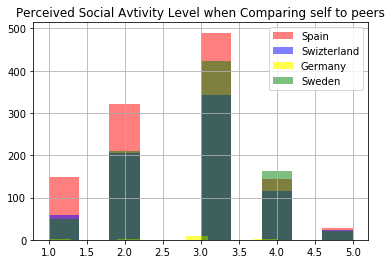

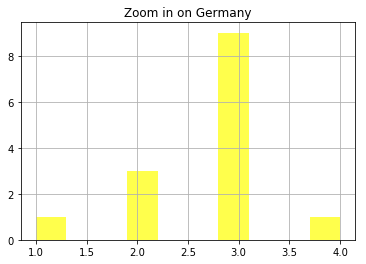

Spain Average:
2.631393298059965
Switzerland Average
2.784656796769852
Germany Average
2.7142857142857144
Sweden Average
2.878892733564014


In [54]:
# 6. Pick three or four of the countries in the sample and compare how often
# people took part in social activities, relative to others their age, in 2014.
# Are there differences, and if so, which countries stand out?
print('Spain Average:')
print(social_es_2014['sclact'].mean())
print('Switzerland Average:')
print(social_ch_2014['sclact'].mean())
print('Germany Average:')
print(social_de_2014['sclact'].mean())
print('Sweden Average:')
print(social_se_2014['sclact'].mean())


F, p = stats.f_oneway(social_es_2014['sclact'],
                      social_ch_2014['sclact'],
                      social_de_2014['sclact'],
                      social_se_2014['sclact'])
print(F)
print(p)

social_es_2014['sclact'].hist(alpha=.5, color='red', label='Spain')
social_ch_2014['sclact'].hist(alpha=.5, color='blue', label='Swizterland')
social_de_2014['sclact'].hist(alpha=.7, color='yellow', label='Germany')
social_se_2014['sclact'].hist(alpha=.5, color='green', label='Sweden')
plt.legend()
plt.title('Perceived Social Avtivity Level when Comparing self to peers')
plt.show()
social_de_2014['sclact'].hist(alpha=.7, color='yellow')
plt.title('Zoom in on Germany')
plt.show()


In [55]:
print('Spain & Switzerland:')
print(stats.ttest_ind(social_es_2014['sclact'], social_ch_2014['sclact']))
print('Spain & Germany:')
print(stats.ttest_ind(social_es_2014['sclact'], social_de_2014['sclact']))
print('Spain & Sweden:')
print(stats.ttest_ind(social_es_2014['sclact'], social_se_2014['sclact']))
print('Germany & Switzerland:')
print(stats.ttest_ind(social_de_2014['sclact'], social_ch_2014['sclact']))
print('Germany & Sweden:')
print(stats.ttest_ind(social_de_2014['sclact'], social_se_2014['sclact']))
print('Switzerland & Sweden:')
print(stats.ttest_ind(social_ch_2014['sclact'], social_se_2014['sclact']))

Spain & Switzerland:
Ttest_indResult(statistic=-3.478987931157087, pvalue=0.0005148090072335817)
Spain & Germany:
Ttest_indResult(statistic=-0.32503027389966244, pvalue=0.7452174850209412)
Spain & Sweden:
Ttest_indResult(statistic=-6.012700644386077, pvalue=2.163487662927079e-09)
Germany & Switzerland:
Ttest_indResult(statistic=-0.28869953984944624, pvalue=0.7728905598034453)
Germany & Sweden:
Ttest_indResult(statistic=-0.7120803198617717, pvalue=0.47660399113995766)
Switzerland & Sweden:
Ttest_indResult(statistic=-2.138086758045346, pvalue=0.03266006699743851)
